# 重回帰分析

## numpy演算

In [1]:
import numpy as np
# vector
# 二重の［］でくくらないとベクトルとして扱えない（ex.転置が効かない）
x =np.array([[1,2,3]])
x

array([[1, 2, 3]])

In [2]:
xt = x.T
xt

array([[1],
       [2],
       [3]])

In [3]:
# matrix
X = np.array([[1, 2],[3, 4]])
X

array([[1, 2],
       [3, 4]])

In [4]:
# transpose
Xt = X.T
Xt

array([[1, 3],
       [2, 4]])

In [5]:
# inverse
X_inv = np.linalg.inv(X)
X_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [6]:
# dot
XX = np.dot(X,X_inv)
XX

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [7]:
#　行列のサイズはshape属性で見える
A = np.array([
    [3,6,7],
    [8,9,3],
])
A.shape

(2, 3)

In [8]:
row, col = A.shape

In [9]:
print(row)
print(col)

2
3


## exercise


In [10]:
X = np.array([
    [1,2,3],
    [1,2,5],
    [1,3,4],
    [1,5,9]
])
y = np.array([[1],[5],[6],[8]])


In [11]:
X

array([[1, 2, 3],
       [1, 2, 5],
       [1, 3, 4],
       [1, 5, 9]])

In [12]:
y

array([[1],
       [5],
       [6],
       [8]])

In [13]:
Xt = X.T
Xt

array([[1, 1, 1, 1],
       [2, 2, 3, 5],
       [3, 5, 4, 9]])

In [14]:
XtX = np.dot(Xt,X)
XtX

array([[  4,  12,  21],
       [ 12,  42,  73],
       [ 21,  73, 131]])

In [15]:
XtXi = np.linalg.inv(XtX)
XtXi

array([[ 1.76530612, -0.39795918, -0.06122449],
       [-0.39795918,  0.84693878, -0.40816327],
       [-0.06122449, -0.40816327,  0.24489796]])

In [16]:
Xty = np.dot(Xt,y)
Xty

array([[ 20],
       [ 70],
       [124]])

In [17]:
w = np.dot(XtXi, Xty)
w

array([[-0.14285714],
       [ 0.71428571],
       [ 0.57142857]])

## scikit-learn

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X,y)

# 入力変数に切片項X0を入れなくてもOK　入れた場合はfit_intercept=Falseにすると、切片を含めたパラメータを出力してくれる

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [19]:
model.coef_

array([[-0.14285714,  0.71428571,  0.57142857]])

In [20]:
model.intercept_

0.0

In [21]:
# 予測精度の確認
model.score(X,y)

0.6923076923076923

In [22]:
x_test = np.array([
    [8,39,5]
])
y_pred = model.predict(x_test)
y_pred

array([[29.57142857]])

# 実データ演習

## データの読み込み、プロット

In [23]:
import pandas as pd
df = pd.read_csv('housing.csv')
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
# サンプル数確認
len(df)

506

In [25]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
# 分布の確認
%matplotlib inline
import seaborn as sns

/Users/soshi.matsuo/.pyenv/versions/anaconda3-5.2.0/envs/pydata/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


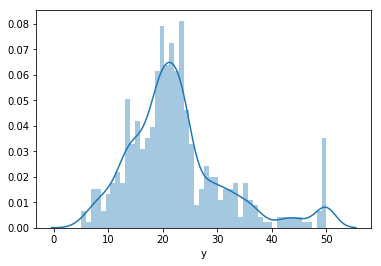

In [27]:
sns.distplot(df['y'],bins=50)

In [28]:
# 相関の確認
#　yとの相関係数が高いxを使うと予測精度が上がりやすい
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
x6,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
x7,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
x8,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
x9,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
x10,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


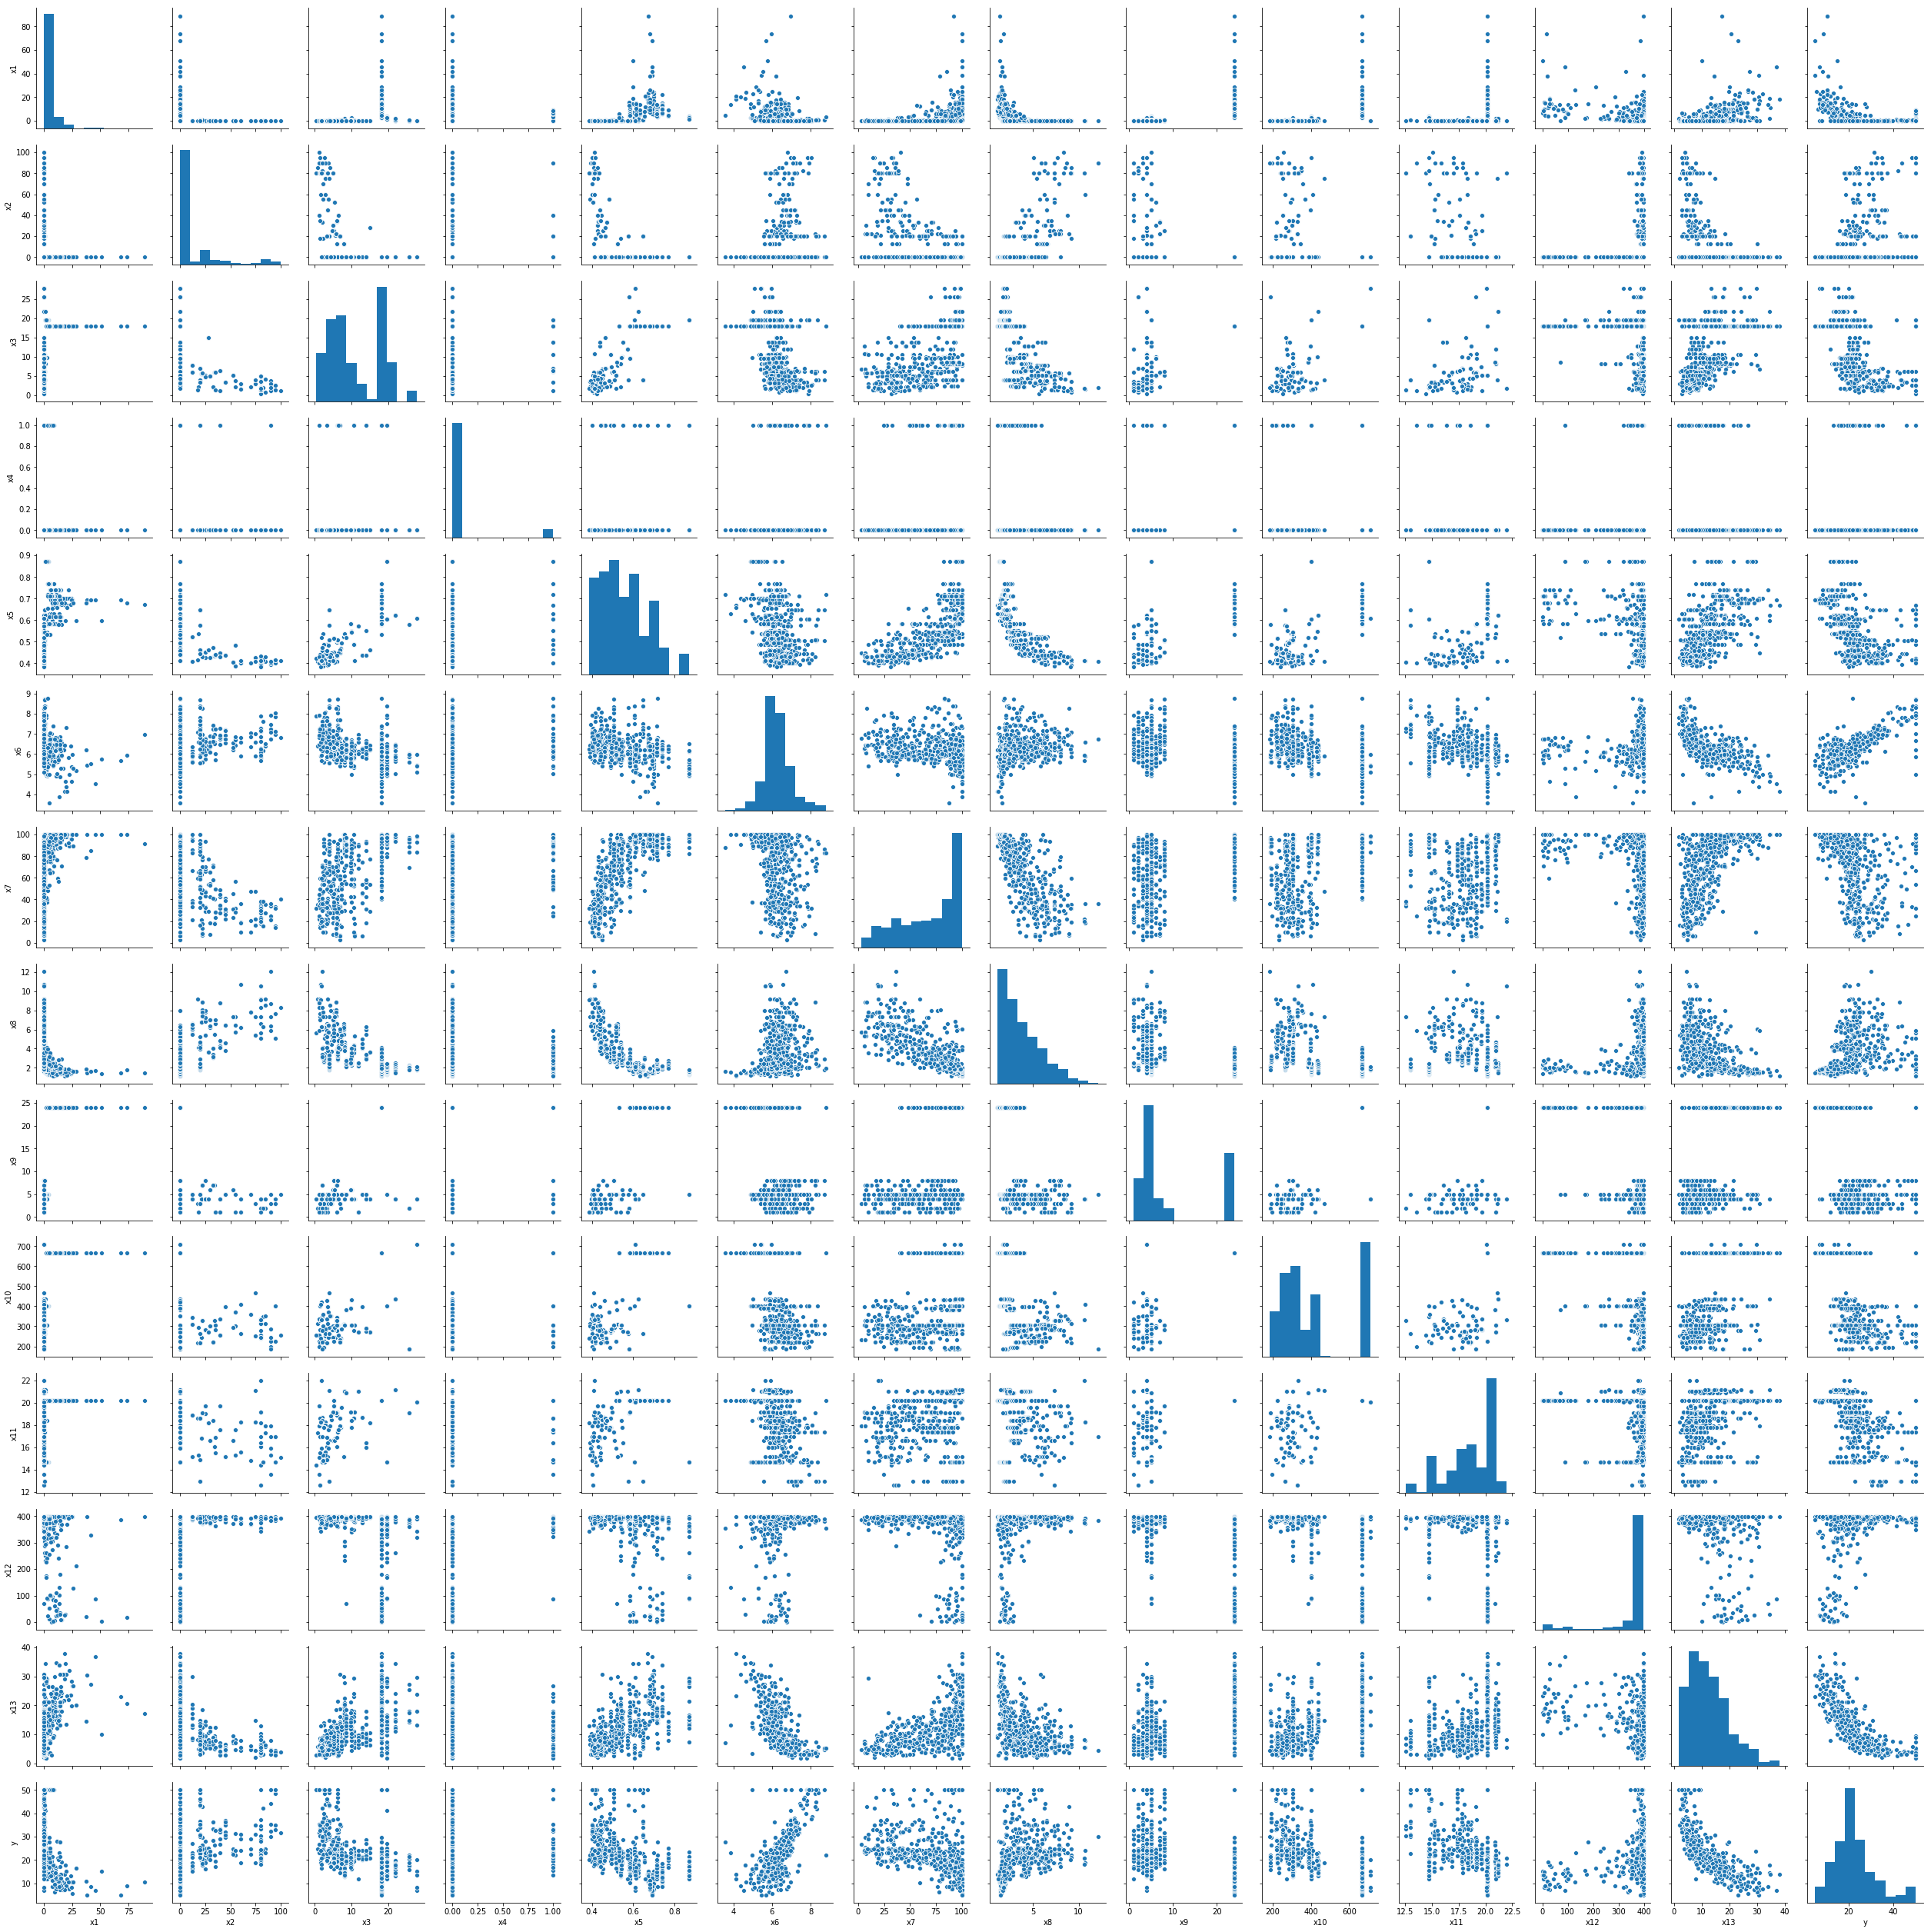

In [29]:
# 相関関係のプロット
sns.pairplot(df)

## 入力、出力の分割

In [30]:
X = df.iloc[:,:-1]

In [31]:
X.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [32]:
y = df.iloc[:,-1]
y.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: y, dtype: float64

## モデル構築、データ分割

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
model.score(X,y)

0.7406426641094094

In [45]:
# train test split
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
model.score(X_test,y_test)

0.7836295385076292

In [49]:
model.score(X_train, y_train)

0.7103879080674731

## 予測値計算

In [50]:
x = X.iloc[0,:]
x

x1       0.00632
x2      18.00000
x3       2.31000
x4       0.00000
x5       0.53800
x6       6.57500
x7      65.20000
x8       4.09000
x9       1.00000
x10    296.00000
x11     15.30000
x12    396.90000
x13      4.98000
Name: 0, dtype: float64

In [54]:
y_pred = model.predict([x])[0]
y_pred

29.802119947787528

## モデル保存&読み込み

In [55]:
from sklearn.externals import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

In [56]:
model_new = joblib.load('model.pkl')

In [57]:
model_new.predict([x])

array([29.80211995])

## パラメータの確認

In [63]:
# parameter values
# パラメータの数値の大小を見れば、どの説明変数がどの程度影響を与えているかわかる
#　Xの値のスケールが揃っている前提！！
model.coef_

array([ -0.099,   0.061,   0.059,   2.44 , -21.47 ,   2.796,   0.004,
        -1.516,   0.308,  -0.011,  -1.005,   0.006,  -0.569])

In [64]:
# 指数関数表示を禁止する
np.set_printoptions(precision=3,suppress=True)
model.coef_

array([ -0.099,   0.061,   0.059,   2.44 , -21.47 ,   2.796,   0.004,
        -1.516,   0.308,  -0.011,  -1.005,   0.006,  -0.569])

## 基本の統計量
- 平均：データの総和をデータ数で割ったもの
- 分散：（各データ-平均）^2の総和をデータ数で割ったもの　各データの分布が平均からバラついている度合い
- 標準偏差：分散の平方根をとったもの  
→分散では２乗によってデータの単位が変わってしまうので、同じ単位のままデータのばらつきを表す指標として使う
- 正規分布：≒一峰性かつ左右対称のヒストグラム　±3σの範囲に全事象の99%が分布するので、正規分布をとって異常検知する手法を実務で3σともいう  
→3σ法は平均に基づいた手法なので、異常値があまりにも大きい場合それに左右されてしまう→hampel Identifier（中央値ベースの手法）もある

## スケーリング
- 説明変数の取りうる範囲は各々全く別であり、パラメータの寄与度を正しく測るためには説明変数のスケールを揃える必要がある
- standard scaling:各データについて平均との差を標準偏差で割ることで、平均0、標準偏差1に各説明変数のスケールを統一する

## 外れ値除去

/Users/soshi.matsuo/.pyenv/versions/anaconda3-5.2.0/envs/pydata/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


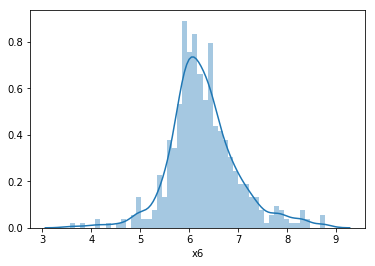

In [75]:
sns.distplot(df['x6'],bins=50)

In [71]:
col = 'x6'

# 平均
mean = df.mean()
#　標準偏差
sigma = df.std()

In [72]:
mean[col]

6.284634387351788

In [73]:
sigma[col]

0.7026171434153234

In [78]:
low = mean[col] - 3* sigma[col]
high = mean[col] + 3* sigma[col]
print(low)
print(high)

4.176782957105817
8.392485817597759


In [82]:
df2 = df[(df[col] > low) & (df[col] < high)]
# df2=外れ値を除去したもの

In [83]:
len(df)

506

In [84]:
len(df2)

498

/Users/soshi.matsuo/.pyenv/versions/anaconda3-5.2.0/envs/pydata/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


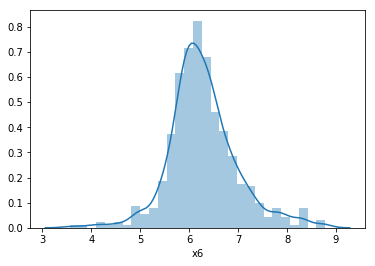

In [85]:
sns.distplot(df['x6'])

/Users/soshi.matsuo/.pyenv/versions/anaconda3-5.2.0/envs/pydata/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


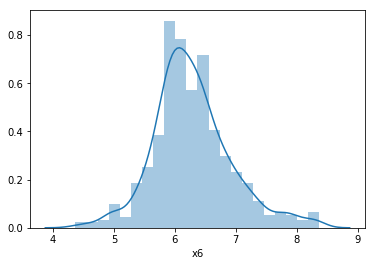

In [86]:
sns.distplot(df2['x6'])

In [87]:
# 各カラムについて外れ値除去(本来は3σ法は正規分布を前提に扱う)
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [90]:
_df = df
for col in cols:
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    _df = _df[(_df[col] > low) &(_df[col] < high)]

In [91]:
len(df)

506

In [92]:
len(_df)

415

外れ値への対処法
- 外れ値は取り除く
- 平均で補完
- 中央値で補完
- PCAを使った後に3σ法適用

## 外れ値除去済みのデータで分析

In [93]:
_df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [94]:
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]

In [103]:
# split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=1)

In [104]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
model.score(X_train,y_train)

0.7972109224535133

In [106]:
#　Over fittingしていることがわかる
model.score(X_test,y_test)

0.6253776004329588

## スケーリングを実践し、変数の貢献度を確認

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
# scaler instance
scaler = StandardScaler()

In [109]:
# scalerに訓練データを食わせる
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [113]:
model = LinearRegression()
model.fit(X_train_s,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
model.score(X_train_s,y_train)

0.7972109224535133

In [115]:
model.score(X_test_s,y_test)

0.6253776004329599

In [116]:
np.set_printoptions(precision=3, suppress=True)

In [118]:
# パラメータ確認
# Xはスケーリング済みなので、目的変数に対する説明変数の貢献度を、パラメータの大小がそのまま表している
model.coef_

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

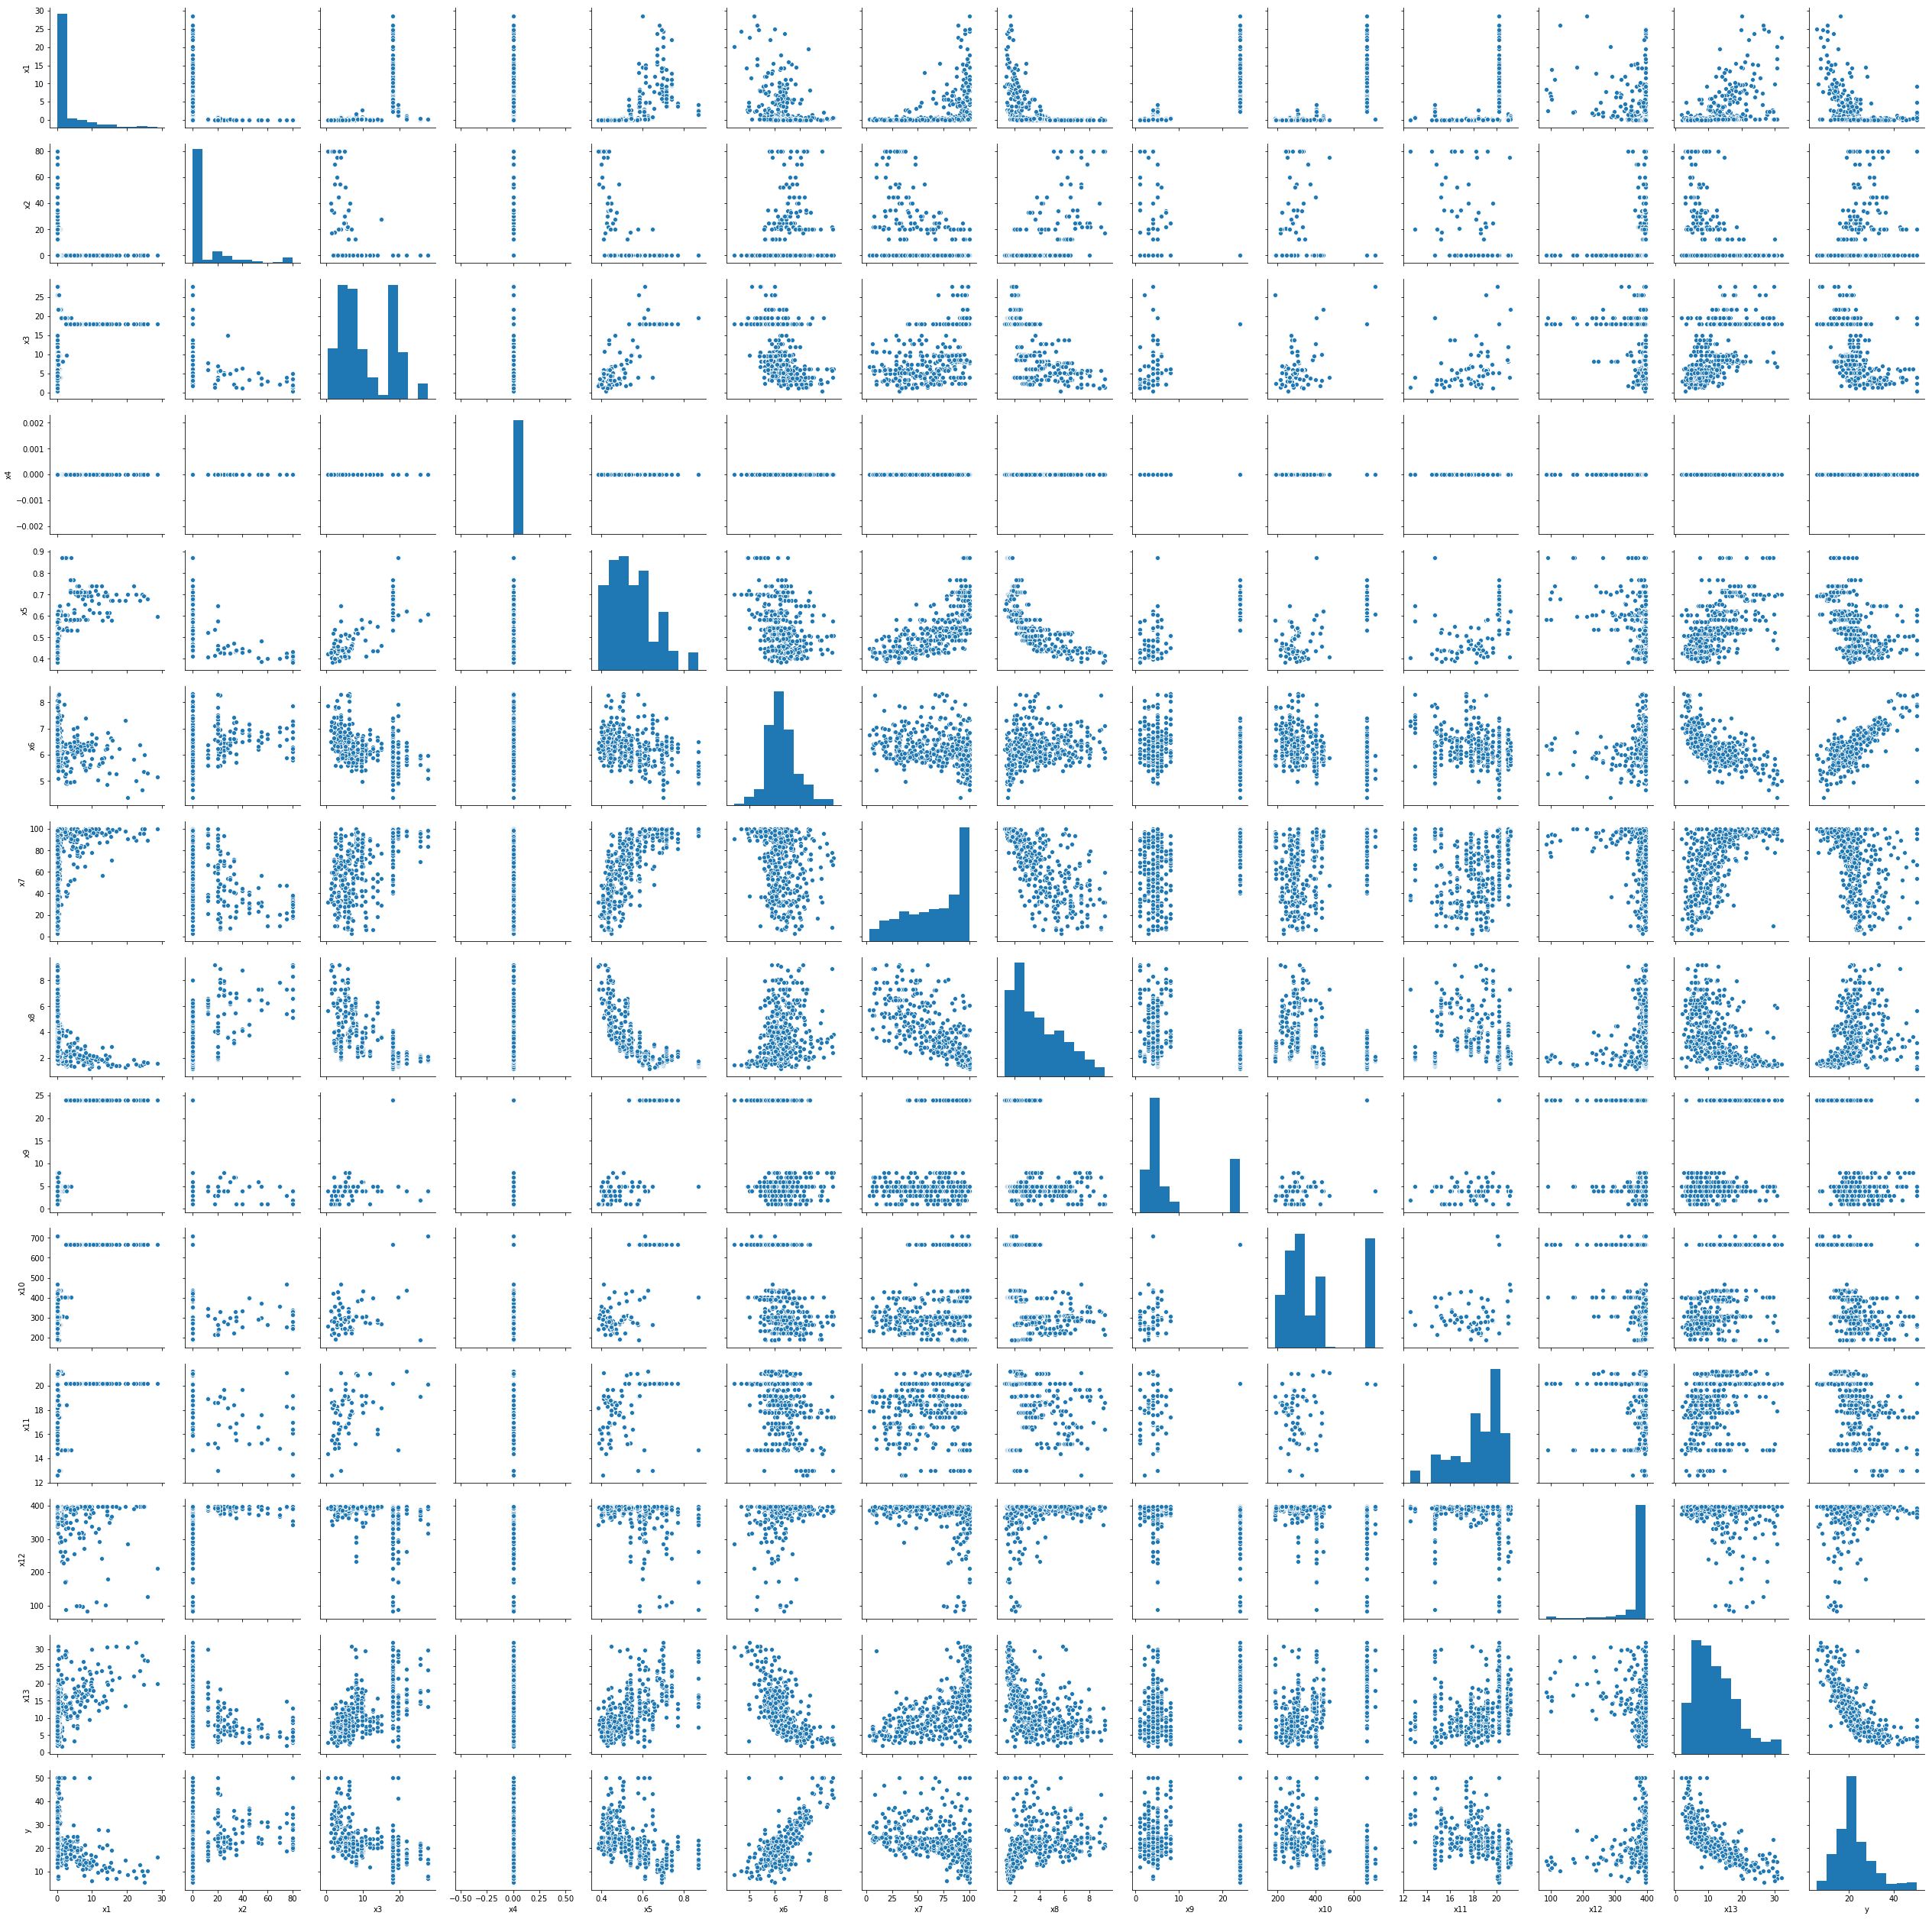

In [120]:
# 相関関係をプロットすると、yとの相関が強い説明変数は↑のパラメータの絶対値も大きい
sns.pairplot(_df)